In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import os
os.getcwd()

'C:\\Users\\Mrunal\\Documents'

In [5]:
data = pd.read_csv(r'C:\\Users\\Mrunal\\Documents\\TopicModellingProjectNews.csv', parse_dates=[0], infer_datetime_format=True)

In [6]:
data.head()

,publish_date,headline_text
0,2005-03-27,baxter protesters forced us to act police
1,2008-09-04,crash woman in critical condition
2,2006-05-03,rain forces fuel reduction burns rethink
3,2008-07-16,govt still pushing for highway funding lucas
4,2009-02-19,south east farm owner named sas top rural woman


In [7]:
data.sort_values('publish_date',inplace=True)

In [8]:
data.head()

,publish_date,headline_text
286211,2003-02-19,police defend aboriginal tent embassy raid
180156,2003-02-19,talk of asian nuclear arms race unhelpful downer
233845,2003-02-19,taipans placing future in publics hands
170928,2003-02-19,most highly educated live in nsw wa
245529,2003-02-19,six palestinians killed in gaza incursion


In [9]:
#Remove numbers in the headline_text column

data['headline_text'] = data['headline_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ',x))

In [10]:
data.head()

,publish_date,headline_text
286211,2003-02-19,police defend aboriginal tent embassy raid
180156,2003-02-19,talk of asian nuclear arms race unhelpful downer
233845,2003-02-19,taipans placing future in publics hands
170928,2003-02-19,most highly educated live in nsw wa
245529,2003-02-19,six palestinians killed in gaza incursion


In [11]:
print(data.shape)

(331100, 2)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import operator

In [13]:
vectorizer = CountVectorizer(max_features=300000, stop_words='english')

In [14]:
news = vectorizer.fit_transform(data['headline_text'])

In [15]:
words = {}
i = 0

sums = np.array(np.sum(news, axis=0)).flatten()

for word in vectorizer.get_feature_names():
    words[word] = sums[i]
    i += 1

In [16]:
top_20 = sorted(words.items(), key=operator.itemgetter(1), reverse=True)[:20]
top_20_words = [i[0] for i in top_20]
top_20_values = [i[1] for i in top_20]

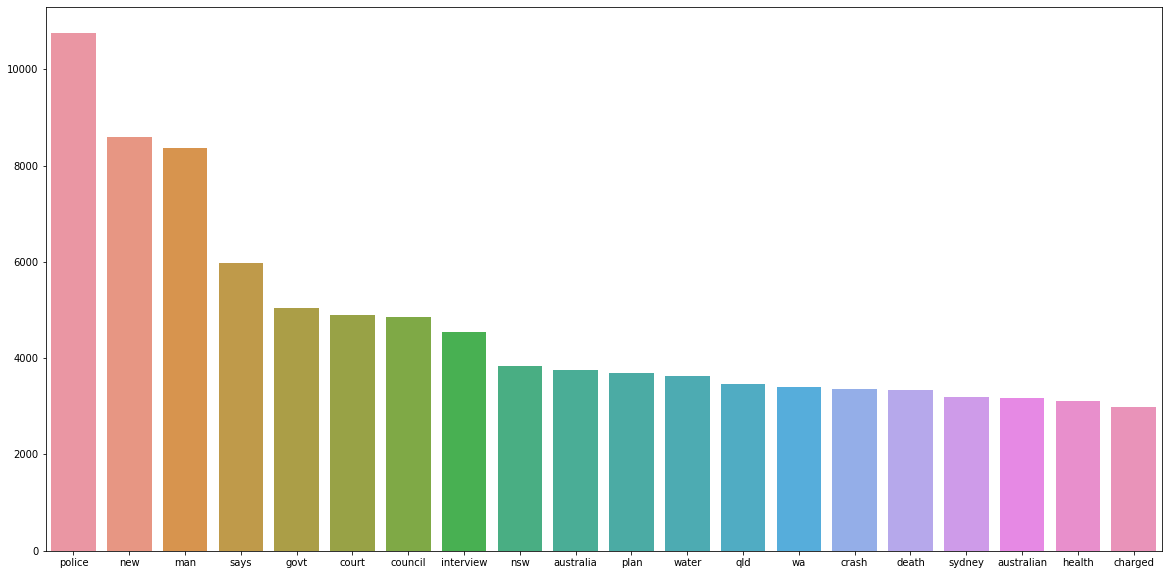

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(top_20_words, top_20_values)
plt.show()

In [18]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from pprint import pprint

In [19]:
#LSA

lsa_model = TruncatedSVD(n_components=5, random_state=2)

lsa_topic_matrix = lsa_model.fit_transform(news)

In [20]:
topic_lsa = {}

# loop over every topic
for i, topic in enumerate(lsa_model.components_):
    key = "Topic {}".format(i)
    value = [(vectorizer.get_feature_names()[i] + '*' + str(topic[i])) for i in topic.argsort()[:-11:-1]]
    topic_lsa[key] = ' + '.join(value)

In [21]:
pprint(topic_lsa)

{'Topic 0': 'police*0.860146519528726 + man*0.37680209605611636 + '
            'new*0.12276960235703452 + court*0.0871501958037979 + '
            'charged*0.07911332117219014 + murder*0.0708567680776744 + '
            'car*0.06811943055778308 + crash*0.06589958252111043 + '
            'death*0.06545880081713176 + missing*0.06459743745740622',
 'Topic 1': 'man*0.7866207286777266 + new*0.1959997703374943 + '
            'court*0.18925530373771432 + charged*0.16433089665150535 + '
            'murder*0.09513426959152241 + accused*0.06832348216999748 + '
            'dies*0.06043438939557508 + jailed*0.053117038383894255 + '
            'guilty*0.0483519676795715 + face*0.04493989265211522',
 'Topic 2': 'new*0.9352197290094992 + says*0.07760668982523405 + '
            'council*0.07247112686162205 + govt*0.06924510058347283 + '
            'plan*0.04291795198705799 + zealand*0.040906582820881755 + '
            'australia*0.03686755127150798 + laws*0.03484667553467118 + '
            '

In [22]:
import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import matplotlib.pyplot as plt

In [23]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [25]:
#1 - Create all text list
headlines = data['headline_text'].tolist()

#2 - call defined function
clean_headlines = [clean(doc).split() for doc in headlines]

#3 - Create dictionary
dictionary =  gensim.corpora.Dictionary(clean_headlines)

#4 - Corpus - Doc-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_headlines]

#5 - build LDA model
lda_model = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, iterations=10, random_state=2)

# extract topics for headlines
topics = lda_model.print_topics(num_topics=5, num_words=10)

# pprint topics
pprint(lda_model.print_topics())

[(0,
  '0.013*"australia" + 0.011*"south" + 0.011*"adelaide" + 0.009*"election" + '
  '0.009*"first" + 0.008*"new" + 0.008*"council" + 0.008*"open" + 0.008*"take" '
  '+ 0.007*"turnbull"'),
 (1,
  '0.014*"new" + 0.013*"wa" + 0.013*"nsw" + 0.012*"government" + 0.011*"call" '
  '+ 0.011*"queensland" + 0.010*"say" + 0.008*"canberra" + 0.008*"sa" + '
  '0.008*"school"'),
 (2,
  '0.017*"man" + 0.016*"police" + 0.015*"woman" + 0.010*"death" + '
  '0.010*"world" + 0.010*"sydney" + 0.008*"perth" + 0.008*"day" + 0.008*"one" '
  '+ 0.008*"year"'),
 (3,
  '0.017*"trump" + 0.015*"u" + 0.014*"say" + 0.012*"child" + 0.012*"melbourne" '
  '+ 0.008*"australian" + 0.008*"australia" + 0.007*"donald" + 0.007*"china" + '
  '0.007*"interview"'),
 (4,
  '0.012*"court" + 0.009*"murder" + 0.009*"sex" + 0.008*"market" + '
  '0.008*"family" + 0.008*"change" + 0.007*"help" + 0.007*"australian" + '
  '0.006*"job" + 0.006*"cut"')]


In [26]:
#Coherence check of LDA

coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_headlines, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.2817006151285487


In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, random_state = 2, num_topics=num_topics, id2word = dictionary, iterations=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
model_list, coherence_values = compute_coherence_values( dictionary=dictionary, corpus=doc_term_matrix, texts=clean_headlines, start=2, limit=50, step=6)
print([round(i,2) for i in coherence_values])

[0.28, 0.26, 0.26, 0.28, 0.32, 0.37, 0.39, 0.42]


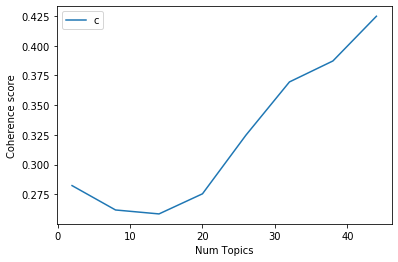

In [29]:
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()